


# Image Watermarking with OpenCV and PIL

This project demonstrates how to add watermarks to images using Python libraries OpenCV and PIL.

We apply both logo and text watermarks, resizing and positioning them appropriately on an image. For this example, we use a BMW logo.

In [ ]:
# Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

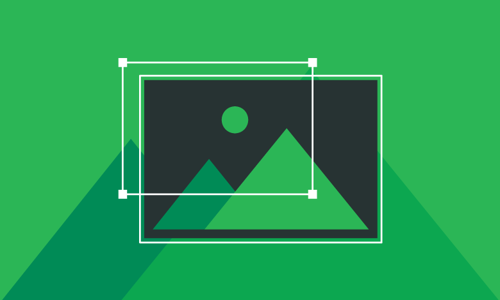

In [ ]:
# Reading image form url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

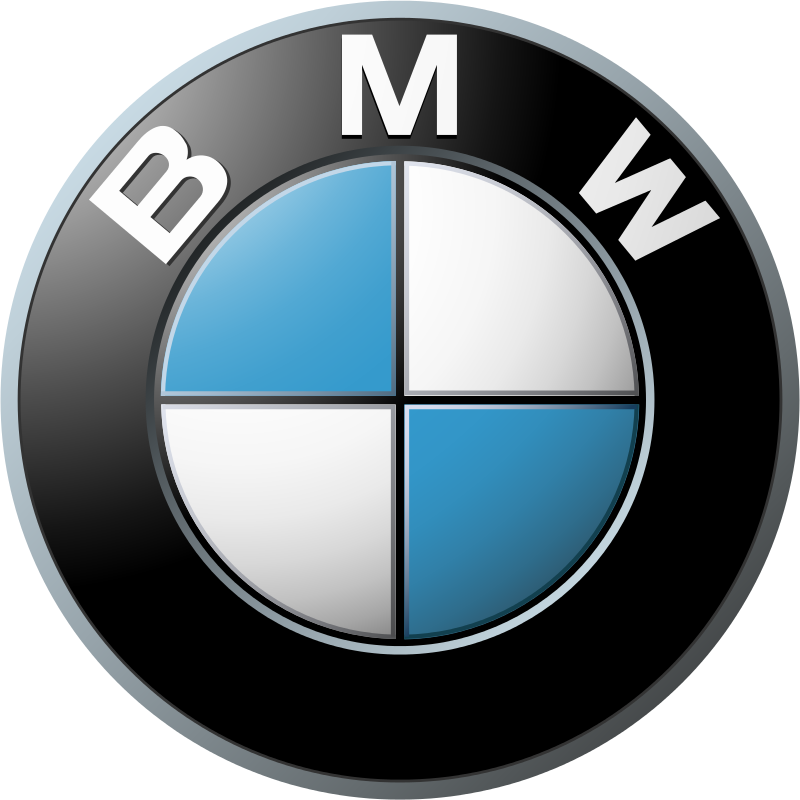

In [ ]:
# Reading logo form url
logo = Image.open(requests.get('https://pngimg.com/uploads/bmw_logo/bmw_logo_PNG19714.png', stream=True).raw)
logo

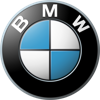

In [ ]:
logo_logow = logo.resize((100,100))
logo_textw = logo.resize((100,100))
logo = logo.resize((100,100))
logo

In [ ]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [ ]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [ ]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

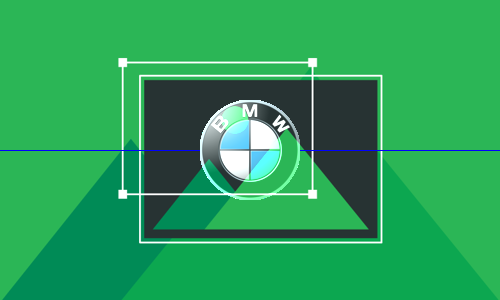

In [ ]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [ ]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='SourabhB', org=(w_image - 95, h_image - 10), fontFace=cv2.QT_FONT_BLACK, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

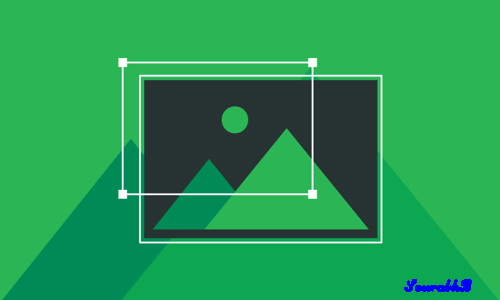

In [ ]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg

## Conclusion:

We successfully added watermarks to an image by:




* Loading and Resizing: We prepared images and resized them for watermarking.

* Applying a Logo Watermark: Using the BMW logo, we resized and blended it onto the image
* Adding a Text Watermark: We overlaid text onto the image using OpenCV.

.
